In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
df1 = pd.read_csv("terminal/First run/output1.txt", sep="\s+", 
                 header=None, names=['measure','topic','value'])
df2 = pd.read_csv("terminal/Second run/output1.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
df3 = pd.read_csv("terminal/Third run/output1.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
df4 = pd.read_csv("terminal/Fourth run/output1.txt", sep="\s+", 
                  header=None, names=['measure','topic','value'])
topic_labels = (df1['topic'].drop_duplicates()).values[:-1]
run_labels = ["Stoplist, Porter stemmer, BM25", "Stoplist, Porter stemmer, TF*IDF", 
              "No stoplist, Porter Stemmer, BM25", "No stoplist, No stemmer, TF*IDF"]

In [38]:
tb = []
tb.append([]) # map
tb.append([]) # Rprec
tb.append([]) # P_10
measures = ["map", "Rprec", "P_10"]
for data in (df1, df2, df3, df4):
    map_v = np.array(data[data['measure'] == measures[0]].values)[:-1]
    tb[0].append(np.delete(map_v, [0,1], axis=1))
    rprec_v = np.array(data[data['measure'] == measures[1]].values)[:-1]
    tb[1].append(np.delete(rprec_v, [0,1], axis=1))
    p10_v = np.array(data[data['measure'] == measures[2]].values)[:-1]
    tb[2].append(np.delete(p10_v, [0,1], axis=1))
tb = np.asarray(tb)
tb = np.squeeze(tb)

In [39]:
measures = tb[0].astype(np.float)
hat_mu_row = np.mean(measures, axis=0) # mean for topic
hat_mu_col = np.mean(measures, axis=1) # mean for system
hat_mu = np.mean(measures, axis=(0,1)) # grand mean
print(hat_mu_row)
print(hat_mu_col)
print(hat_mu)

[0.359675 0.033275 0.2201   0.07875  0.08275  0.0107   0.27655  0.2152
 0.0155   0.27725  0.290925 0.06925  0.033725 0.488925 0.691975 0.353875
 0.071    0.35285  0.2682   0.08725  0.002025 0.106825 0.38765  0.228775
 0.18225  0.018225 0.267725 0.004075 0.14125  0.212525 0.02805  0.465875
 0.016325 0.19015  0.261975 0.02755  0.116675 0.0271   0.018975 0.0825
 0.155375 0.357    0.0676   0.02145  0.100025 0.277    0.023075 0.0137
 0.087675 0.355075]
[0.172194 0.171466 0.17634  0.161776]
0.17044399999999998


In [40]:
df_ap = pd.DataFrame(
    {
        run_labels[0]: tb[0][0],
        run_labels[1]: tb[0][1],
        run_labels[2]: tb[0][2],
        run_labels[3]: tb[0][3]
    }, index=topic_labels, dtype=np.float)
stack = (df_ap.stack()).reset_index()
stack = stack.rename(columns={'level_0': 'topic', 'level_1': 'run', 0: 'ap_value'})

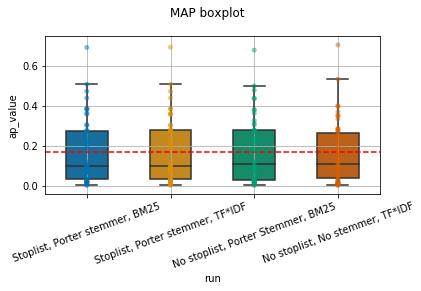

In [45]:
fig, ax = plt.subplots()
bplot = sns.boxplot(y='ap_value', x='run', data=stack, width=0.5, palette='colorblind', ax=ax, showfliers=False)
bplot = sns.stripplot(y='ap_value', x='run', data=stack, jitter=False, marker='o', alpha=0.5, palette='colorblind', ax=ax)
ax.grid()
ax.axhline(y=hat_mu, color='r', linestyle='--')
fig.suptitle('MAP boxplot')
plt.xticks(rotation=20)
plt.gcf().subplots_adjust(bottom=0.33)
#bplot.set_xticklabels(run_labels, rotation=20)
#bplot.figure.savefig(file_name, format='jpeg', dpi=100)
fig.savefig('images/Boxplot_MAP_1.jpg')